In [1]:
#Requirements
#!pip install mlxtend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
#Reading Activity Store data
#This data consists of transactions at a store from Feb 17th to Feb 23 2022.as_integer_ratio.

mba_data = pd.read_csv('Activity_store.csv') 
mba_data

,Week_strt,PURCH_DATE,CUST_id,PROD_ID
0,17FEB22,17FEB22,58222157597,4138316742
1,17FEB22,17FEB22,58222157597,5200039685
2,17FEB22,17FEB22,58222157597,7214008486
3,17FEB22,17FEB22,58222157597,4138316742
4,17FEB22,17FEB22,58222157597,5200039685
...,...,...,...,...
257498,17FEB22,23FEB22,58217851899,4119008123
257499,17FEB22,23FEB22,58217851899,4119014948
257500,17FEB22,23FEB22,58217851899,7572007730
257501,17FEB22,23FEB22,58217851899,26986807669


In [4]:
mba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257503 entries, 0 to 257502
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Week_strt   257503 non-null  object
 1   PURCH_DATE  257503 non-null  object
 2   CUST_id     257503 non-null  int64 
 3   PROD_ID     257503 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 7.9+ MB


In [5]:
#checking for null elements in the dataset
mba_data.isnull().sum()

Week_strt     0
PURCH_DATE    0
CUST_id       0
PROD_ID       0
dtype: int64

In [6]:
#Data description

mba_data.nunique()
print('This data consits of {0} week of transactions\nWith {2} unique customers and \n{3} unique products'.format(mba_data['Week_strt'].nunique(), mba_data['PURCH_DATE'].nunique(), mba_data['CUST_id'].nunique(), mba_data['PROD_ID'].nunique() ))

This data consits of 1 week of transactions
With 10354 unique customers and 
27115 unique products


In [7]:
#Convert the 'InvoiceDate' column to datetime format
mba_data['PURCH_DATE']= pd.to_datetime(mba_data['PURCH_DATE'])

#Extracting day
mba_data['Day'] = mba_data['PURCH_DATE'].dt.day

mba_data

,Week_strt,PURCH_DATE,CUST_id,PROD_ID,Day
0,17FEB22,2022-02-17,58222157597,4138316742,17
1,17FEB22,2022-02-17,58222157597,5200039685,17
2,17FEB22,2022-02-17,58222157597,7214008486,17
3,17FEB22,2022-02-17,58222157597,4138316742,17
4,17FEB22,2022-02-17,58222157597,5200039685,17
...,...,...,...,...,...
257498,17FEB22,2022-02-23,58217851899,4119008123,23
257499,17FEB22,2022-02-23,58217851899,4119014948,23
257500,17FEB22,2022-02-23,58217851899,7572007730,23
257501,17FEB22,2022-02-23,58217851899,26986807669,23


In [8]:
mba_data['PROD_ID'].value_counts().head(10)

11680          3919
12333          1071
10751          1040
1466841670     1039
17514           937
11749           935
11757           921
11738           823
11722           723
20284807669     717
Name: PROD_ID, dtype: int64

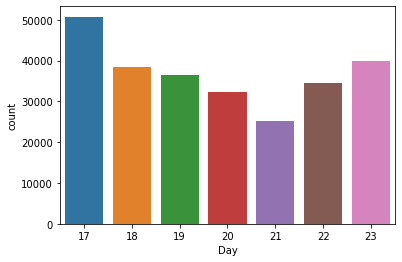

In [9]:
#Plotting number of items purchased on each day
day_plot = sns.countplot(x='Day', data=mba_data)

<ipython-input-10-b99c3bb7fe76>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  top_10_purchased.set_xticklabels(top_10_purchased.get_xticklabels())


Text(0, 0.5, 'Top 10 items')

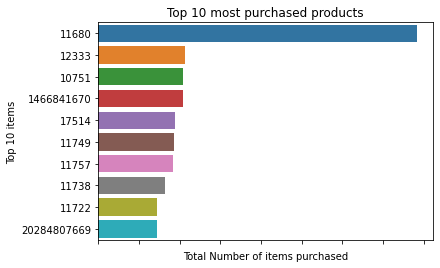

In [10]:
#Top 10 most purchased products
top_10_purchased=sns.countplot(y='PROD_ID', data=mba_data, order=mba_data['PROD_ID'].value_counts().iloc[:10].index)

top_10_purchased.set_xticklabels(top_10_purchased.get_xticklabels())
top_10_purchased.set_title('Top 10 most purchased products')
top_10_purchased.set_xlabel('Total Number of items purchased') 
top_10_purchased.set_ylabel('Top 10 items')

<ipython-input-11-fd33fadba4b7>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  bottom_10_purchased.set_xticklabels(bottom_10_purchased.get_xticklabels())


Text(0, 0.5, 'Bottom 10 items')

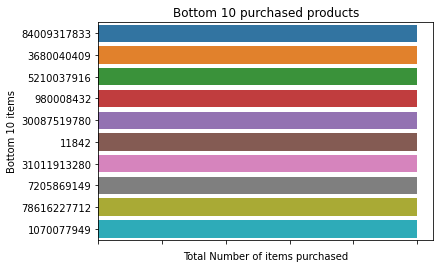

In [11]:
#Bottom 10 purchased products
bottom_10_purchased=sns.countplot(y='PROD_ID', data=mba_data, order=mba_data['PROD_ID'].value_counts().iloc[-10:].index)

bottom_10_purchased.set_xticklabels(bottom_10_purchased.get_xticklabels())
bottom_10_purchased.set_title('Bottom 10 purchased products')
bottom_10_purchased.set_xlabel('Total Number of items purchased') 
bottom_10_purchased.set_ylabel('Bottom 10 items')

In [12]:
cols = ['PURCH_DATE','CUST_id','PROD_ID']
mba_data['Quantity'] = mba_data.groupby(cols)['PROD_ID'].transform('size')
mba_data = mba_data.drop_duplicates()
mba_data

,Week_strt,PURCH_DATE,CUST_id,PROD_ID,Day,Quantity
0,17FEB22,2022-02-17,58222157597,4138316742,17,2
1,17FEB22,2022-02-17,58222157597,5200039685,17,2
2,17FEB22,2022-02-17,58222157597,7214008486,17,2
6,17FEB22,2022-02-17,58223569706,11719,17,2
7,17FEB22,2022-02-17,58223569706,11730,17,2
...,...,...,...,...,...,...
257498,17FEB22,2022-02-23,58217851899,4119008123,23,1
257499,17FEB22,2022-02-23,58217851899,4119014948,23,1
257500,17FEB22,2022-02-23,58217851899,7572007730,23,1
257501,17FEB22,2022-02-23,58217851899,26986807669,23,1


In [13]:
mba_data['Invoice'] = mba_data.groupby(['PURCH_DATE', 'CUST_id']).ngroup()
mba_data

<ipython-input-13-652f80181226>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mba_data['Invoice'] = mba_data.groupby(['PURCH_DATE', 'CUST_id']).ngroup()


,Week_strt,PURCH_DATE,CUST_id,PROD_ID,Day,Quantity,Invoice
0,17FEB22,2022-02-17,58222157597,4138316742,17,2,1379
1,17FEB22,2022-02-17,58222157597,5200039685,17,2,1379
2,17FEB22,2022-02-17,58222157597,7214008486,17,2,1379
6,17FEB22,2022-02-17,58223569706,11719,17,2,1641
7,17FEB22,2022-02-17,58223569706,11730,17,2,1641
...,...,...,...,...,...,...,...
257498,17FEB22,2022-02-23,58217851899,4119008123,23,1,13233
257499,17FEB22,2022-02-23,58217851899,4119014948,23,1,13233
257500,17FEB22,2022-02-23,58217851899,7572007730,23,1,13233
257501,17FEB22,2022-02-23,58217851899,26986807669,23,1,13233


In [14]:
print('No. of Transactions: {0}\nNo. of products {1}'.format(len(mba_data['Invoice'].unique()), len(mba_data['PROD_ID'].unique())))

No. of Transactions: 14505
No. of products 27115


In [15]:
basket = mba_data.groupby(['Invoice','PROD_ID'])['Quantity'].sum().unstack().fillna(0)
basket

PROD_ID,7670,8458,9071,9074,9082,9090,9239,10192,10709,10723,...,980000007820,980000007861,980000007871,980000007911,980000007971,980000008000,980000008021,980000008030,980000008051,980000008071
Invoice,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Transforming the bsakets into one hot representation:

In [16]:
#If product exists in the basket means 1 lack of product in basket means 0
basket_model = basket.applymap(lambda x: 1 if x > 0 else 0)
basket_model

PROD_ID,7670,8458,9071,9074,9082,9090,9239,10192,10709,10723,...,980000007820,980000007861,980000007871,980000007911,980000007971,980000008000,980000008021,980000008030,980000008051,980000008071
Invoice,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Apriori

In [25]:
frequent_itemsets = apriori(basket_model, min_support=0.004, use_colnames=True, low_memory=True)
frequent_itemsets

,support,itemsets
0,0.004688,(10723)
1,0.063151,(10751)
2,0.005584,(10790)
3,0.022268,(10952)
4,0.004964,(11104)
...,...,...
611,0.004343,"(11680, 17514, 11757)"
612,0.004274,"(11680, 17514, 11894)"
613,0.004757,"(11680, 12333, 1466841670)"
614,0.005722,"(11680, 17514, 17502)"


In [18]:
#Using Association Rules
rules_apriori = association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules_apriori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10952),(10751),0.022268,0.063151,0.004274,0.191950,3.039565,0.002868,1.159396
1,(10751),(10952),0.063151,0.022268,0.004274,0.067686,3.039565,0.002868,1.048715
2,(11680),(10751),0.223095,0.063151,0.027439,0.122991,1.947587,0.013350,1.068233
3,(10751),(11680),0.063151,0.223095,0.027439,0.434498,1.947587,0.013350,1.373831
4,(11722),(10751),0.045088,0.063151,0.008618,0.191131,3.026596,0.005770,1.158222
...,...,...,...,...,...,...,...,...,...
513,"(11738, 20284807669)",(4119012780),0.018890,0.024681,0.005860,0.310219,12.569068,0.005394,1.413954
514,"(4119012780, 20284807669)",(11738),0.007928,0.045708,0.005860,0.739130,16.170569,0.005498,3.658118
515,(11738),"(4119012780, 20284807669)",0.045708,0.007928,0.005860,0.128205,16.170569,0.005498,1.137965
516,(4119012780),"(11738, 20284807669)",0.024681,0.018890,0.005860,0.237430,12.569068,0.005394,1.286584


In [19]:
rules_apriori.sort_values(['confidence', 'lift'], ascending =[False, False]) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
514,"(4119012780, 20284807669)",(11738),0.007928,0.045708,0.005860,0.739130,16.170569,0.005498,3.658118
411,"(11736, 10751)",(11680),0.005722,0.223095,0.004137,0.722892,3.240279,0.002860,2.803612
454,"(11722, 17514)",(11680),0.007032,0.223095,0.004688,0.666667,2.988257,0.003119,2.330714
442,"(17514, 10751)",(11680),0.008893,0.223095,0.005653,0.635659,2.849268,0.003669,2.132355
508,"(17514, 17502)",(11680),0.009100,0.223095,0.005722,0.628788,2.818470,0.003692,2.092886
...,...,...,...,...,...,...,...,...,...
250,(11680),(81318708702),0.223095,0.008549,0.004068,0.018232,2.132748,0.002160,1.009863
226,(11680),(27078507669),0.223095,0.009169,0.004068,0.018232,1.988427,0.002022,1.009231
240,(11680),(75166649074),0.223095,0.010134,0.004068,0.018232,1.799053,0.001807,1.008248
248,(11680),(81204908579),0.223095,0.010134,0.004068,0.018232,1.799053,0.001807,1.008248


In [20]:
def get_top10(rules, item):
    for a in rules['antecedents']:
        indexs = []
        if item in a:             
            indx = rules[rules['antecedents'] == a].index.values
            indexs.append(indx)
             
    top10 =  rules.iloc[indx].sort_values(['lift','confidence'], ascending=[False, False])['consequents'][:10]
    
    top = []
    for t in top10:
        rec = []
        for f in t:
            rec.append(f)        
        top = top + rec

    return top, top10

In [21]:
#Top 10 recommendations for given product
product = 11736
top, top10 = get_top10(rules_apriori, product)

In [22]:
print('Top 10 recommendations for item {0} are as follows:\n\n{1}'.format(product, set(top)))

Top 10 recommendations for item 11736 are as follows:

{11680, 11749, 11722, 17514, 11757, 12333, 11894, 10751}


In [23]:
rules_apriori.iloc[top10.index]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
413,(11736),"(11680, 10751)",0.028059,0.027439,0.004137,0.147420,5.372687,0.003367,1.140727
306,(11736),(11757),0.028059,0.053292,0.006687,0.238329,4.472142,0.005192,1.242936
308,(11736),(11894),0.028059,0.039710,0.004412,0.157248,3.959869,0.003298,1.139469
258,(11736),(11722),0.028059,0.045088,0.004343,0.154791,3.433097,0.003078,1.129794
304,(11736),(11749),0.028059,0.056325,0.005309,0.189189,3.358861,0.003728,1.163865
10,(11736),(10751),0.028059,0.063151,0.005722,0.203931,3.229282,0.003950,1.176845
312,(11736),(17514),0.028059,0.056532,0.004343,0.154791,2.738105,0.002757,1.116254
310,(11736),(12333),0.028059,0.060462,0.004481,0.159705,2.641418,0.002785,1.118105
70,(11736),(11680),0.028059,0.223095,0.012754,0.454545,2.037448,0.006494,1.424325
